In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import math
import operator

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
df = pd.read_excel("/content/drive/My Drive/geeta_new.xlsx")

In [4]:
df['Shloka Number'] = df.groupby('Chapter').cumcount() + 1

In [5]:
df

,Chapter,Shloka,English Translation By Swami Adidevananda,English Translation By Shri Purohit Swami,English Translation By Swami Sivananda,English Translation By Mahatama Gandhi,Shloka Number
0,1,धृतराष्ट्र उवाच धर्मक्षेत्रे कुरुक्षेत्रे समव...,Dhritarashtra said On the holy field of Kuruk...,"The King Dhritarashtra asked: ""O Sanjaya! Wha...",Dhritarashtra said What did my people and the...,"Tell me, O Sanjaya, what my sons and Pandu ass...",1
1,1,सञ्जय उवाच दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...,"Sanjaya said King Duryodhana, on seeing the A...","Sanjaya replied: ""The Prince Duryodhana, when...",Sanjaya said Having seen the army of the Pand...,On seeing the Arjuna army drawn up in battle a...,2
2,1,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम्। व...,"Behold, O teacher, this mighty army of the Pa...",Revered Father! Behold this mighty host of th...,"""Behold, O Teacher! this mighty army of the s...","Behold, O preceptor, this mighty army of the s...",3
3,1,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि। युयुधा...,"There (in that army) are heroes, great bowmen...",In it are heroes and great bowmen; the equals...,"Here are heroes, mighty archers, eal in battl...","Here are brave bowmen, peers of Bhima and Arju...",4
4,1,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान्। पुर...,"Dhrstaketu, Cekitana, and the valiant king of...","Dhrishtaketu, Chekitan, the valiant King of B...","""Dhrishtaketu, chekitana and the valiant king...","Dhrishtaketu, Chekitana, valorous Kashiraja, P...",5
...,...,...,...,...,...,...,...
696,18,सञ्जय उवाचइत्यहं वासुदेवस्य पार्थस्य च महात्म...,Sanjaya said Thus have I heard this wondrous ...,"Sanjaya told: ""Thus have I heard this rare, w...",Sanjaya said Thus I have heard this wonderful...,", Thus did I hear this marvellous and thrillin...",74
697,18,व्यासप्रसादाच्छ्रुतवानेतद्गुह्यमहं परम्।योगं ...,By the grace of Vyasa have I heard this supre...,"Through the blessing of the sage Vyasa, I lis...",Through the grace of Vyasa I have heard this ...,It was by Vyasa favor that I listened to this ...,75
698,18,राजन्संस्मृत्य संस्मृत्य संवादमिममद्भुतम्।केश...,"O King, remembering again and again this wond...",O King! The more I think of that marvellous a...,"O King, remembering this wonderful and holy d...","O King, as often as I recall that marvellous a...",76
699,18,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः। ...,And remembering over and over again that most...,As memory recalls again and again the exceedi...,"And, remembering again and again, also that m...",And as often as I recall that marvellous form ...,77


In [6]:
df.to_excel("/content/drive/My Drive/geeta_neww.xlsx", index = False)

In [ ]:
Adidevananda = df['English Translation By Swami Adidevananda']
Adidevananda = Adidevananda.tolist()

In [ ]:
Adidevananda = [str(text) if not pd.isna(text) else "" for text in Adidevananda]
Adidevananda_vec = model.encode(Adidevananda)
Adidevananda_vec

array([[ 0.01878989, -0.01670255, -0.01979149, ...,  0.07381471,
        -0.02418732, -0.03245679],
       [ 0.09851617, -0.04122503, -0.01470888, ...,  0.03274765,
        -0.01624694, -0.05812882],
       [ 0.04551115,  0.07087582, -0.03914181, ...,  0.07098778,
         0.02006046, -0.03510411],
       ...,
       [ 0.02604359,  0.04483565, -0.04491178, ...,  0.04146234,
        -0.02439339, -0.00518476],
       [-0.0230927 , -0.0108962 , -0.04812006, ...,  0.02716418,
        -0.03829338, -0.0425857 ],
       [-0.00980854,  0.08887518, -0.04498743, ...,  0.04611595,
        -0.01551897, -0.06667941]], dtype=float32)

In [ ]:
Adidevananda_vec[0].shape

(768,)

In [ ]:
Adidevananda_vec_ds = pd.DataFrame(Adidevananda_vec)
Adidevananda_vec_ds

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.018790,-0.016703,-0.019791,-0.021890,0.010532,-0.016825,-0.028671,0.021681,-0.010870,0.012255,...,0.020552,-0.015798,-0.045935,0.038058,-0.017270,0.009227,-0.032426,0.073815,-0.024187,-0.032457
1,0.098516,-0.041225,-0.014709,0.028883,0.048036,0.006446,-0.010152,-0.032810,-0.035793,-0.015940,...,0.020227,-0.002454,0.006188,0.000441,-0.004923,0.038306,-0.037833,0.032748,-0.016247,-0.058129
2,0.045511,0.070876,-0.039142,-0.029832,0.049161,0.007659,0.057945,-0.014228,0.011808,-0.039101,...,-0.024538,0.035966,-0.054416,0.045413,-0.025374,-0.020755,-0.033624,0.070988,0.020060,-0.035104
3,0.047618,-0.009185,-0.019422,0.000275,0.034893,-0.009183,-0.005714,-0.035854,0.009787,-0.042164,...,-0.040027,-0.007298,0.039922,0.053834,-0.010058,0.004539,-0.016860,0.031573,0.036949,-0.058179
4,0.053137,-0.024070,-0.003976,-0.015998,-0.002744,0.026793,-0.005589,-0.014078,0.013940,0.013985,...,-0.029005,0.004026,0.013381,0.057770,-0.040706,-0.015435,-0.011805,0.058793,-0.004557,-0.037702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.036409,0.040163,-0.025992,0.019174,0.030295,-0.008810,-0.080411,-0.009148,-0.025475,0.031588,...,0.014449,0.052369,0.053049,0.017290,0.010736,0.014684,0.006580,0.035395,-0.040764,-0.025502
697,0.014773,-0.041248,-0.043579,0.013434,0.025664,-0.009459,-0.043804,0.068292,-0.009850,0.018665,...,0.024825,0.055408,0.006686,0.016285,0.017649,-0.011423,-0.005619,0.048889,-0.051200,-0.038890
698,0.026044,0.044836,-0.044912,0.008832,0.022562,-0.033831,-0.097122,0.005103,0.006433,0.022263,...,-0.046840,0.040382,0.078479,0.049084,-0.015953,-0.003287,0.030717,0.041462,-0.024393,-0.005185
699,-0.023093,-0.010896,-0.048120,-0.002966,0.022523,-0.002530,-0.088664,0.004759,-0.001092,0.026308,...,-0.028752,0.040760,0.090203,0.037343,-0.021126,-0.043213,0.003827,0.027164,-0.038293,-0.042586


In [ ]:
Adidevananda_vec_ds.to_excel("/content/drive/My Drive/Adidevananda_vec.xlsx", index=False)

In [ ]:
Purohit = df['English Translation By Shri Purohit Swami']
Purohit = Purohit.tolist()

In [ ]:
Purohit_vec = model.encode(Purohit)
Purohit_vec

array([[ 0.06347013, -0.03228955, -0.01492695, ...,  0.04735811,
        -0.0256073 , -0.03391137],
       [ 0.08321426, -0.04869167, -0.02614068, ...,  0.06656227,
         0.00125531, -0.04770404],
       [ 0.01649628,  0.01390771, -0.03876402, ...,  0.0552441 ,
         0.01907299, -0.02043322],
       ...,
       [-0.01182564,  0.08044551, -0.01140931, ...,  0.02932841,
        -0.01091647, -0.00763213],
       [-0.06178279,  0.06232155, -0.03026685, ..., -0.00957912,
         0.01017136, -0.02068159],
       [ 0.06338642,  0.05960816, -0.03988128, ...,  0.03357716,
        -0.00406532, -0.0609644 ]], dtype=float32)

In [ ]:
import pickle

save_path = '/content/drive/My Drive/Purohit_vec.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(Purohit_vec, f)


In [ ]:
Purohit_vec_ds = pd.DataFrame(Purohit_vec)
Purohit_vec_ds.to_excel("/content/drive/My Drive/Purohit_vec.xlsx", index = False)

In [ ]:
Sivananda = df['English Translation By Swami Sivananda']
Sivananda = Sivananda.tolist()

In [ ]:
Sivananda_vec = model.encode(Sivananda)
Sivananda_vec

array([[ 0.00504433, -0.04522124, -0.01962379, ...,  0.04769776,
        -0.03715157, -0.03252089],
       [ 0.10457323, -0.05230946, -0.01453095, ...,  0.04577761,
        -0.01267898, -0.05033041],
       [ 0.05165507,  0.01575385, -0.03234155, ...,  0.02558478,
         0.00887968, -0.04143266],
       ...,
       [ 0.01055378,  0.0728164 , -0.04439593, ...,  0.0264193 ,
        -0.0204635 , -0.00765149],
       [-0.01087593,  0.01408083, -0.04961173, ...,  0.01857875,
        -0.02592388, -0.04623892],
       [ 0.03447525,  0.08654787, -0.03730119, ...,  0.05958514,
        -0.04516935, -0.06141172]], dtype=float32)

In [ ]:
save_path = '/content/drive/My Drive/Sivananda_vec.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(Sivananda_vec, f)

In [ ]:
Sivananda_vec_ds = pd.DataFrame(Sivananda_vec)
Sivananda_vec_ds.to_excel("/content/drive/My Drive/Sivananda_vec.xlsx", index = False)

In [ ]:
Gandhi = df['English Translation By Mahatama Gandhi']
Gandhi = Gandhi.tolist()

In [ ]:
Gandhi_vec = model.encode(Gandhi)
Gandhi_vec

array([[ 0.05879441, -0.04532959, -0.02687693, ...,  0.05469099,
        -0.04138002, -0.043673  ],
       [ 0.07943139, -0.07075829, -0.03140513, ...,  0.04299892,
        -0.0179942 , -0.05958061],
       [ 0.04214538,  0.00218407, -0.03818036, ...,  0.03704191,
         0.00260885, -0.04138457],
       ...,
       [ 0.02903983,  0.07547984, -0.04205636, ...,  0.05497173,
        -0.03857408, -0.03733113],
       [-0.03044993,  0.03815907, -0.0525574 , ...,  0.04771502,
        -0.0221797 , -0.05387999],
       [ 0.05727164,  0.02321171, -0.03650303, ...,  0.03045331,
        -0.02461215, -0.07147614]], dtype=float32)

In [ ]:
save_path = '/content/drive/My Drive/Gandhi_vec.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(Gandhi_vec, f)

In [ ]:
Gandhi_vec_ds = pd.DataFrame(Gandhi_vec)
Gandhi_vec_ds.to_excel("/content/drive/My Drive/Gandhi_vec.xlsx", index = False)

In [ ]:
Adidevananda_Purohit = []
for i in range(len(Adidevananda_vec)):
  Adidevananda_Purohit.append(cosine_similarity([Adidevananda_vec[i]],[Purohit_vec[i]])[0][0])

In [ ]:
len(Adidevananda_Purohit)

701

In [ ]:
Adidevananda_Sivananda = []
for i in range(len(Adidevananda_vec)):
  Adidevananda_Sivananda.append(cosine_similarity([Adidevananda_vec[i]],[Sivananda_vec[i]])[0][0])

In [ ]:
Adidevananda_Gandhi = []
for i in range(len(Adidevananda_vec)):
  Adidevananda_Gandhi.append(cosine_similarity([Adidevananda_vec[i]],[Gandhi_vec[i]])[0][0])

In [ ]:
Purohit_Sivananda = []
for i in range(len(Purohit_vec)):
  Purohit_Sivananda.append(cosine_similarity([Purohit_vec[i]],[Sivananda_vec[i]])[0][0])

In [ ]:
Purohit_Gandhi = []
for i in range(len(Purohit_vec)):
  Purohit_Gandhi.append(cosine_similarity([Purohit_vec[i]],[Gandhi_vec[i]])[0][0])

In [ ]:
Sivananda_Gandhi = []
for i in range(len(Sivananda_vec)):
  Sivananda_Gandhi.append(cosine_similarity([Sivananda_vec[i]],[Gandhi_vec[i]])[0][0])

In [ ]:
ds_cs = pd.DataFrame()
ds_cs['Adidevananda_Purohit'] = Adidevananda_Purohit

In [ ]:
ds_cs['Adidevananda_Sivananda'] = Adidevananda_Sivananda
ds_cs['Adidevananda_Gandhi'] = Adidevananda_Gandhi
ds_cs['Purohit_Sivananda'] = Purohit_Sivananda
ds_cs['Purohit_Gandhi'] = Purohit_Gandhi
ds_cs['Sivananda_Gandhi'] = Sivananda_Gandhi

In [ ]:
ds_cs

,Adidevananda_Purohit,Adidevananda_Sivananda,Adidevananda_Gandhi,Purohit_Sivananda,Purohit_Gandhi,Sivananda_Gandhi
0,0.850335,0.849603,0.678888,0.751199,0.617044,0.766652
1,0.818774,0.881291,0.834614,0.885435,0.767141,0.800955
2,0.768606,0.774075,0.733828,0.679687,0.656956,0.952662
3,0.856083,0.745736,0.810319,0.674639,0.791753,0.693782
4,0.833590,0.865909,0.822371,0.755989,0.814033,0.768272
...,...,...,...,...,...,...
696,0.873123,0.823475,0.850143,0.683755,0.841136,0.678380
697,0.634483,0.859197,0.874700,0.625401,0.721280,0.808310
698,0.615441,0.958047,0.762767,0.683352,0.602605,0.763568
699,0.684863,0.965362,0.887811,0.690134,0.647234,0.894628


In [ ]:
ds_cs.to_excel("/content/drive/My Drive/cosine_similarity.xlsx", index = False)

In [ ]:
ds = pd.read_excel("/content/drive/My Drive/cosine_similarity.xlsx")

In [ ]:
ds['Chapter'] = df['Chapter']
ds

,Adidevananda_Purohit,Adidevananda_Sivananda,Adidevananda_Gandhi,Purohit_Sivananda,Purohit_Gandhi,Sivananda_Gandhi,Chapter
0,0.850335,0.849603,0.678888,0.751199,0.617044,0.766652,1
1,0.818774,0.881291,0.834614,0.885435,0.767141,0.800955,1
2,0.768606,0.774075,0.733828,0.679687,0.656956,0.952662,1
3,0.856083,0.745736,0.810319,0.674639,0.791753,0.693782,1
4,0.833590,0.865909,0.822371,0.755989,0.814033,0.768272,1
...,...,...,...,...,...,...,...
696,0.873123,0.823475,0.850143,0.683755,0.841136,0.678380,18
697,0.634483,0.859197,0.874700,0.625401,0.721280,0.808310,18
698,0.615441,0.958047,0.762767,0.683352,0.602605,0.763568,18
699,0.684863,0.965362,0.887811,0.690134,0.647234,0.894628,18


In [ ]:
ds.to_excel("/content/drive/My Drive/cosine_similarity_new.xlsx", index = False)

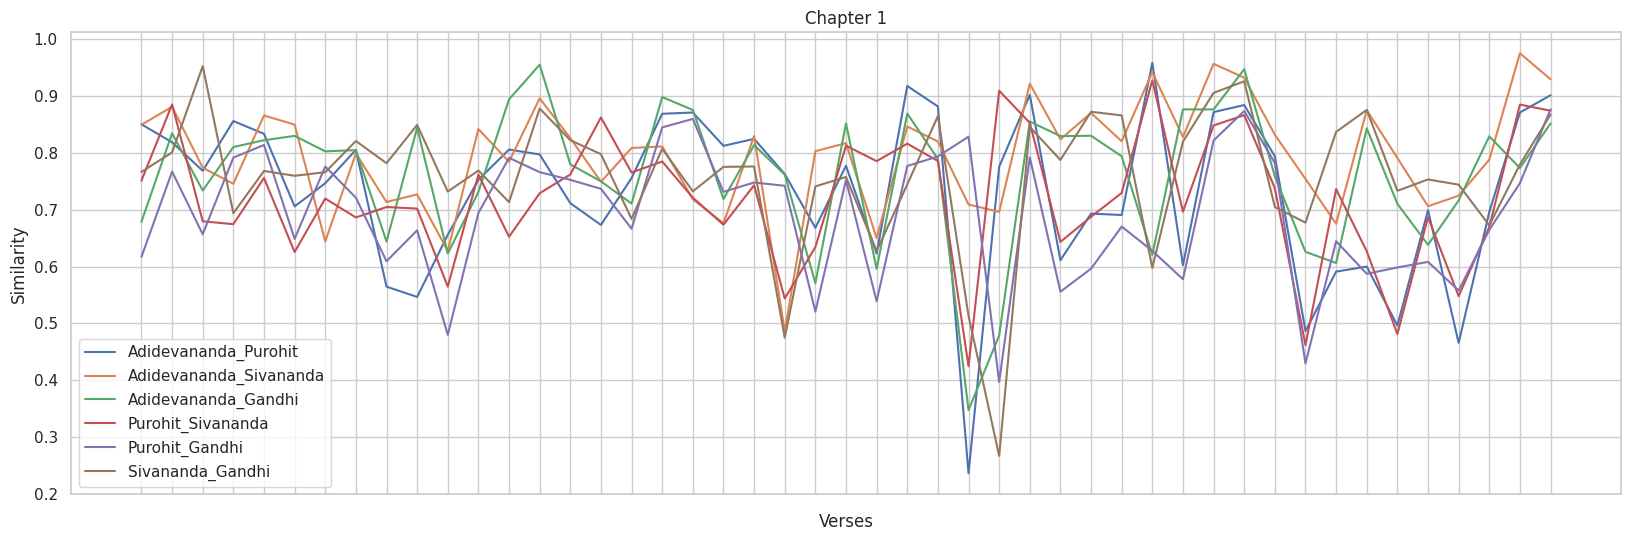

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
i=1
chap = ds[ds['Chapter'] == i]

plt.figure(figsize=(20, 6))
plt.title(f'Chapter {i}')
plt.xlabel('Verses')
plt.ylabel('Similarity')

plt.plot(chap.index, chap['Adidevananda_Purohit'], label='Adidevananda_Purohit')
plt.plot(chap.index, chap['Adidevananda_Sivananda'], label='Adidevananda_Sivananda')
plt.plot(chap.index, chap['Adidevananda_Gandhi'], label='Adidevananda_Gandhi')
plt.plot(chap.index, chap['Purohit_Sivananda'], label='Purohit_Sivananda')
plt.plot(chap.index, chap['Purohit_Gandhi'], label='Purohit_Gandhi')
plt.plot(chap.index, chap['Sivananda_Gandhi'], label='Sivananda_Gandhi')

verse_labels = [''] * len(chap.index)
plt.xticks(chap.index, verse_labels)

plt.legend()
plt.show()


In [ ]:
maximum_difference_adidevananda_gandhi = ds.loc[(ds['Adidevananda_Gandhi'] < 0.7)]
maximum_difference_adidevananda_gandhi.shape

(187, 6)

In [ ]:
maximum_difference = maximum_difference_adidevananda_gandhi.loc[(maximum_difference_adidevananda_gandhi['Adidevananda_Purohit'] < 0.7) &
                                                                (maximum_difference_adidevananda_gandhi['Adidevananda_Sivananda'] < 0.7) &
                                                                (maximum_difference_adidevananda_gandhi['Purohit_Sivananda'] < 0.7) &
                                                                (maximum_difference_adidevananda_gandhi['Sivananda_Gandhi'] < 0.7) &
                                                                (maximum_difference_adidevananda_gandhi['Purohit_Gandhi'] < 0.7)]

maximum_difference

,Adidevananda_Purohit,Adidevananda_Sivananda,Adidevananda_Gandhi,Purohit_Sivananda,Purohit_Gandhi,Sivananda_Gandhi
48,0.439231,0.692598,0.494901,0.481034,0.371545,0.501733
87,0.639352,0.567244,0.681375,0.521295,0.613861,0.590441
120,0.661625,0.671769,0.575007,0.676366,0.620809,0.685287
123,0.623377,0.667371,0.625063,0.697390,0.632728,0.689553
174,0.488944,0.665904,0.594343,0.633568,0.560393,0.683141
215,0.684796,0.683585,0.659216,0.653460,0.632831,0.587496
222,0.388229,0.655074,0.616553,0.431116,0.600561,0.690220
229,0.572177,0.593637,0.672834,0.574376,0.652431,0.626881
240,0.296569,0.640386,0.672765,0.364644,0.397489,0.679527
246,0.604694,0.611062,0.560556,0.524538,0.510094,0.652329


In [ ]:
maximum_difference.shape

(21, 6)

In [ ]:
maximum_difference.to_excel("/content/drive/My Drive/maximum_difference.xlsx")

In [ ]:
df = pd.read_excel("/content/drive/My Drive/geeta_new.xlsx")

In [ ]:
ds['Total'] = ds['Adidevananda_Gandhi'] + ds['Adidevananda_Sivananda'] + ds['Adidevananda_Purohit'] + ds['Purohit_Gandhi'] + ds['Sivananda_Gandhi'] + ds['Purohit_Sivananda']
ds['Chapter'] = df['Chapter']

In [ ]:
ds['Max sum'] = ds.groupby(['Chapter'])['Total'].transform('max')
ds

,Adidevananda_Purohit,Adidevananda_Sivananda,Adidevananda_Gandhi,Purohit_Sivananda,Purohit_Gandhi,Sivananda_Gandhi,Total,Chapter,Max sum
0,0.850335,0.849603,0.678888,0.751199,0.617044,0.766652,4.513721,1,5.430463
1,0.818774,0.881291,0.834614,0.885435,0.767141,0.800955,4.988210,1,5.430463
2,0.768606,0.774075,0.733828,0.679687,0.656956,0.952662,4.565814,1,5.430463
3,0.856083,0.745736,0.810319,0.674639,0.791753,0.693782,4.572312,1,5.430463
4,0.833590,0.865909,0.822371,0.755989,0.814033,0.768272,4.860165,1,5.430463
...,...,...,...,...,...,...,...,...,...
696,0.873123,0.823475,0.850143,0.683755,0.841136,0.678380,4.750011,18,5.479522
697,0.634483,0.859197,0.874700,0.625401,0.721280,0.808310,4.523371,18,5.479522
698,0.615441,0.958047,0.762767,0.683352,0.602605,0.763568,4.385779,18,5.479522
699,0.684863,0.965362,0.887811,0.690134,0.647234,0.894628,4.770033,18,5.479522


In [ ]:
ds.to_excel("/content/drive/My Drive/cosine_similarity2.xlsx", index = False)

In [7]:
ds = pd.read_excel("/content/drive/My Drive/cosine_similarity2.xlsx")

In [8]:
ds['Shloka Number'] = df['Shloka Number']

In [10]:
ds.drop('Chapter', axis = 1, inplace = True)
ds_max_sum = pd.concat([df, ds], axis = 1)
# ds_max_sum.drop('Chapter', axis = 1, inplace = True)
ds_max_sum = ds_max_sum.loc[(ds['Max sum'] == ds['Total'])]

In [11]:
ds_max_sum

,Chapter,Shloka,English Translation By Swami Adidevananda,English Translation By Shri Purohit Swami,English Translation By Swami Sivananda,English Translation By Mahatama Gandhi,Shloka Number,Adidevananda_Purohit,Adidevananda_Sivananda,Adidevananda_Gandhi,Purohit_Sivananda,Purohit_Gandhi,Sivananda_Gandhi,Total,Max sum,Shloka Number
36,1,तस्मान्नार्हा वयं हन्तुं धार्तराष्ट्रान्स्वबा...,"Therefore, it is not befitting that we slay o...",We are worthy of a nobler feat than to slaugh...,"Therefore, we should not kill the sons of Dhr...",It does not therefore behove us to kill our ki...,37,0.884274,0.932395,0.947340,0.866539,0.873833,0.926082,5.430463,5.430463,37
57,2,श्री भगवानुवाच अशोच्यानन्वशोचस्त्वं प्रज्ञावा...,The Lord said You grieve for those who should...,Lord Shri Krishna said: Why grieve for those ...,The Blessed Lord said You have grieved for th...,", You mourn for them whom you should not mourn...",11,0.861035,0.980340,0.893067,0.855604,0.836019,0.884789,5.310853,5.310853,11
125,3,यस्त्विन्द्रियाणि मनसा नियम्यारभतेऽर्जुन। कर्...,"But he who, subduing his senses by the mind, ...","But, O Arjuna! All honour to him whose mind c...","But whosoever, controlling the senses by the ...","But he, O Arjuna, who keeping all the senses u...",7,0.876787,0.952864,0.935086,0.850803,0.842205,0.949381,5.407125,5.407125,7
200,4,श्रद्धावाँल्लभते ज्ञानं तत्परः संयतेन्द्रियः।...,"He who has faith, who is intent on it, and wh...","He who is full of faith attains wisdom, and h...","The man who is full of faith, who is devoted ...",It is the man of faith who gains knowledgethe ...,39,0.906376,0.919819,0.939097,0.848392,0.860679,0.917830,5.392193,5.392193,39
216,5,सर्वकर्माणि मनसा संन्यस्यास्ते सुखं वशी। नवद्...,"The embodied self, mentally resigning all act...","Mentally renouncing all actions, the self-con...",Mentally renouncing all actions and self-cont...,"Renouncing with the mind all actions, the dwel...",13,0.815114,0.861786,0.823826,0.840608,0.839056,0.813200,4.993590,4.993590,13
267,6,श्री भगवानुवाच असंशयं महाबाहो मनो दुर्निग्रहं...,The Lord said The mind is hard to subdue and ...,"Lord Shri Krishna replied: Doubtless, O Might...","The Blessed Lord said Undoubtedly, O mighty-a...","Undoubtedly, O Arjuna, the mind is fickle and ...",35,0.827108,0.895113,0.811348,0.865019,0.802596,0.886159,5.087342,5.087342,35
286,7,मत्तः परतरं नान्यत्किञ्चिदस्ति धनञ्जय। मयि सर...,"There is nothing higher than Myself, O Arjuna...",O Arjuna! There is nothing higher than Me; al...,"There is nothing whatsoever higher than Me, O...","There is nothing higher than I, O Arjuna; all ...",7,0.932054,0.961854,0.950656,0.927411,0.910385,0.922030,5.604391,5.604391,7
316,8,तस्मात्सर्वेषु कालेषु मामनुस्मर युध्य च। मय्य...,NaN,"Therefore meditate always on Me, and fight; i...",Therefore at all times remember Me only and f...,", Therefore at all times remember Me and fight...",7,0.159283,0.139950,0.180152,0.841558,0.871578,0.856043,3.048564,3.048564,7
355,9,गतिर्भर्ता प्रभुः साक्षी निवासः शरणं सुहृत्। ...,"I am the goal, supporter, the Lord, the witne...","I am the Goal, the Sustainer, the Lord, the W...","I am the goal, the supporter, the Lord, the w...","I am the Goal, the Sustainer, the Lord, the Wi...",18,0.855813,0.926320,0.881137,0.868884,0.892807,0.915419,5.340381,5.340381,18
374,10,यो मामजमनादिं च वेत्ति लोकमहेश्वरम्। असम्मूढः...,He who knows Me as unborn and without a begin...,"He who knows Me as the unborn, without beginn...","He who knows Me as unborn and beginningless, ...","He who knows Me, the great lord of the worlds,...",3,0.895004,0.967893,0.899066,0.897108,0.816067,0.907934,5.383071,5.383071,3


In [12]:
ds_max_sum.to_excel("/content/drive/My Drive/max_sum2.xlsx")

In [ ]:
ds['Chapter'] = df['Chapter']

In [ ]:
ds['Min sum'] = ds.groupby(['Chapter'])['Total'].transform('min')

In [ ]:
# ds.drop(['Chapter', 'Max sum'], axis = 1, inplace = True)
ds_min_sum = pd.concat([df, ds], axis = 1)
# ds_max_sum.drop('Chapter', axis = 1, inplace = True)
ds_min_sum = ds_max_sum.loc[(ds['Min sum'] == ds['Total'])]
# ds_max_sum.to_excel("max_sum.xlsx")

In [ ]:
ds_min_sum.to_excel("/content/drive/My Drive/min_sum.xlsx")

In [ ]:
ds['Chapter'] = df['Chapter']
ds_mean_Adidevananda_Purohit = ds.groupby('Chapter')['Adidevananda_Purohit'].mean().reset_index()
ds_mean_Adidevananda_Sivananda = ds.groupby('Chapter')['Adidevananda_Sivananda'].mean().reset_index()
ds_mean_Adidevananda_Gandhi = ds.groupby('Chapter')['Adidevananda_Gandhi'].mean().reset_index()
ds_mean_Purohit_Sivananda = ds.groupby('Chapter')['Purohit_Sivananda'].mean().reset_index()
ds_mean_Purohit_Gandhi = ds.groupby('Chapter')['Purohit_Gandhi'].mean().reset_index()
ds_mean_Sivananda_Gandhi = ds.groupby('Chapter')['Sivananda_Gandhi'].mean().reset_index()
ds_std_Adidevananda_Purohit = ds.groupby('Chapter')['Adidevananda_Purohit'].std().reset_index()
ds_std_Adidevananda_Sivananda = ds.groupby('Chapter')['Adidevananda_Sivananda'].std().reset_index()
ds_std_Adidevananda_Gandhi = ds.groupby('Chapter')['Adidevananda_Gandhi'].std().reset_index()
ds_std_Purohit_Sivananda = ds.groupby('Chapter')['Purohit_Sivananda'].std().reset_index()
ds_std_Purohit_Gandhi = ds.groupby('Chapter')['Purohit_Gandhi'].std().reset_index()
ds_std_Sivananda_Gandhi = ds.groupby('Chapter')['Sivananda_Gandhi'].std().reset_index()

In [ ]:
ds_mean_Adidevananda_Gandhi

,Chapter,Adidevananda_Gandhi
0,1,0.761849
1,2,0.757507
2,3,0.744399
3,4,0.759289
4,5,0.728854
5,6,0.770557
6,7,0.784325
7,8,0.112112
8,9,0.787105
9,10,0.793376


In [ ]:
ds_std_Purohit_Gandhi

,Chapter,Purohit_Gandhi
0,1,0.116751
1,2,0.127526
2,3,0.112203
3,4,0.120641
4,5,0.110005
5,6,0.137578
6,7,0.134766
7,8,0.114721
8,9,0.079660
9,10,0.122601


In [ ]:
ds_mean = pd.DataFrame()
ds_mean['Chapter'] = ds_mean_Adidevananda_Purohit['Chapter']
ds_mean['mean_Adidevananda_Purohit'] = ds_mean_Adidevananda_Purohit['Adidevananda_Purohit']
ds_mean['mean_Adidevananda_Sivananda'] = ds_mean_Adidevananda_Sivananda['Adidevananda_Sivananda']
ds_mean['mean_Adidevananda_Gandhi'] = ds_mean_Adidevananda_Gandhi['Adidevananda_Gandhi']
ds_mean['mean_Purohit_Sivananda'] = ds_mean_Purohit_Sivananda['Purohit_Sivananda']
ds_mean['mean_Purohit_Gandhi'] = ds_mean_Purohit_Gandhi['Purohit_Gandhi']
ds_mean['mean_Sivananda_Gandhi'] = ds_mean_Sivananda_Gandhi['Sivananda_Gandhi']
ds_mean['std_Adidevananda_Purohit'] = ds_std_Adidevananda_Purohit['Adidevananda_Purohit']
ds_mean['std_Adidevananda_Sivananda'] = ds_std_Adidevananda_Sivananda['Adidevananda_Sivananda']
ds_mean['std_Adidevananda_Gandhi'] = ds_std_Adidevananda_Gandhi['Adidevananda_Gandhi']
ds_mean['std_Purohit_Sivananda'] = ds_std_Purohit_Sivananda['Purohit_Sivananda']
ds_mean['std_Purohit_Gandhi'] = ds_std_Purohit_Gandhi['Purohit_Gandhi']
ds_mean['std_Sivananda_Gandhi'] = ds_std_Sivananda_Gandhi['Sivananda_Gandhi']

In [ ]:
ds_mean

,Chapter,mean_Adidevananda_Purohit,mean_Adidevananda_Sivananda,mean_Adidevananda_Gandhi,mean_Purohit_Sivananda,mean_Purohit_Gandhi,mean_Sivananda_Gandhi,std_Adidevananda_Purohit,std_Adidevananda_Sivananda,std_Adidevananda_Gandhi,std_Purohit_Sivananda,std_Purohit_Gandhi,std_Sivananda_Gandhi
0,1,0.733738,0.795694,0.761849,0.720879,0.691539,0.759708,0.143729,0.097376,0.121603,0.115807,0.116751,0.119976
1,2,0.676489,0.801608,0.757507,0.681764,0.668527,0.749618,0.152237,0.103581,0.108254,0.156501,0.127526,0.108286
2,3,0.687922,0.774342,0.744399,0.732177,0.695149,0.771176,0.104216,0.111548,0.121404,0.105417,0.112203,0.112185
3,4,0.677537,0.802195,0.759289,0.697308,0.697978,0.803894,0.128700,0.093756,0.105536,0.126046,0.120641,0.109182
4,5,0.649439,0.771737,0.728854,0.666247,0.630909,0.746222,0.128855,0.083079,0.107510,0.109847,0.110005,0.135101
5,6,0.642311,0.796731,0.770557,0.663416,0.636217,0.773517,0.120728,0.099536,0.136413,0.120722,0.137578,0.126499
6,7,0.708262,0.811834,0.784325,0.760421,0.697259,0.784096,0.150455,0.124501,0.101591,0.126013,0.134766,0.109798
7,8,0.110158,0.094713,0.112112,0.672044,0.670135,0.780948,0.044390,0.042192,0.044179,0.122777,0.114721,0.086079
8,9,0.730536,0.817405,0.787105,0.750451,0.734252,0.788525,0.092556,0.096622,0.094430,0.105195,0.079660,0.098068
9,10,0.729206,0.818817,0.793376,0.760760,0.720315,0.796377,0.134847,0.081571,0.091326,0.117120,0.122601,0.083443


In [ ]:
ds_mean.to_excel("/content/drive/My Drive/mean_cosine_similarity.xlsx", index = False)